## Seção 03 - CNN
# Aluno: Bruno Moreira Ribas 

In [1]:


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten,Dropout
from tensorflow.keras.models import Model

# Classificação - Fashion MNIST

In [2]:

# Carga dos dados
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
# Adicionar uma dimensão:
# N x H x W -> N x H x W x C
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)
x_train.shape:  (60000, 28, 28, 1)
x_test.shape:  (10000, 28, 28, 1)


In [3]:

# número de classes
K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)



model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)
     

Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5194 - accuracy: 0.8077 - val_loss: 0.3887 - val_accuracy: 0.8519
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3617 - accuracy: 0.8639 - val_loss: 0.3584 - val_accuracy: 0.8661
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3108 - accuracy: 0.8824 - val_loss: 0.3149 - val_accuracy: 0.8860
Epoch 4/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2787 - accuracy: 0.8955 - val_loss: 0.3164 - val_accuracy: 0.8838
Epoch 5/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2541 - accuracy: 0.9050 - val_loss: 0.3026 - val_accuracy: 0.8887
Epoch 6/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2297 - accuracy: 0.9124 - val_loss: 0.2900 - val_accuracy: 0.8974
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2126 - accuracy: 0.9190 - val_loss: 0.2996 -

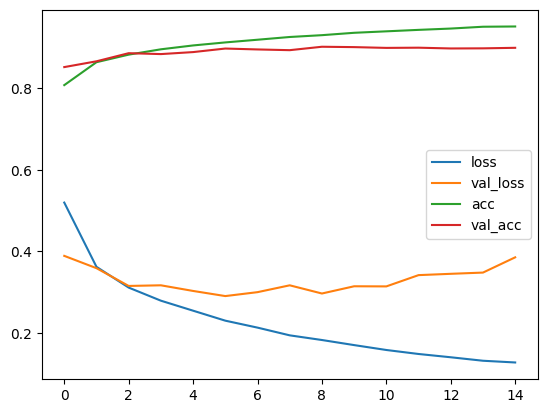

In [4]:

# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 3s 8ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

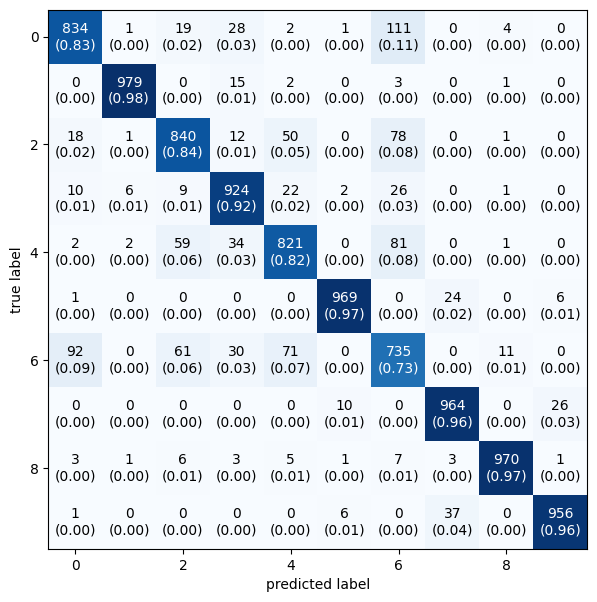

In [5]:

# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Text(0.5, 1.0, 'True label: Coat Predicted: Dress')

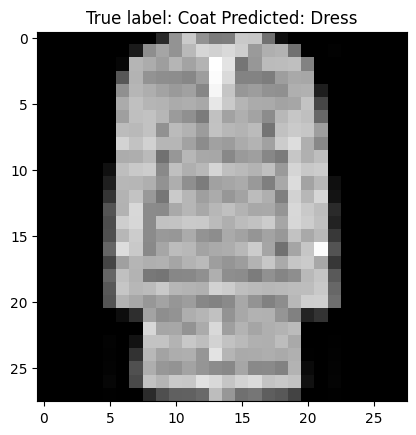

In [6]:

labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],
labels[y_pred[i]]))

# CIFAR 10

In [7]:

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000,)


In [8]:

# número de classes
K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)

In [9]:


model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 64s 39ms/step - loss: 1.5547 - accuracy: 0.4313 - val_loss: 1.2678 - val_accuracy: 0.5444
Epoch 2/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2784 - accuracy: 0.5436 - val_loss: 1.1522 - val_accuracy: 0.5912
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1506 - accuracy: 0.5891 - val_loss: 1.0453 - val_accuracy: 0.6303
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0637 - accuracy: 0.6203 - val_loss: 0.9998 - val_accuracy: 0.6384
Epoch 5/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9854 - accuracy: 0.6506 - val_loss: 0.9554 - val_accuracy: 0.6582
Epoch 6/15
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9268 - accuracy: 0.6728 - val_loss: 0.9039 - val_accuracy: 0.6852
Epoch 7/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8755 - accuracy: 0.6881 - val_loss: 0.9028 -

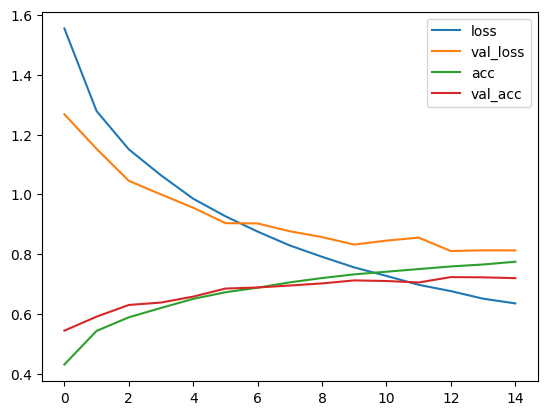

In [10]:

# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 2s 8ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

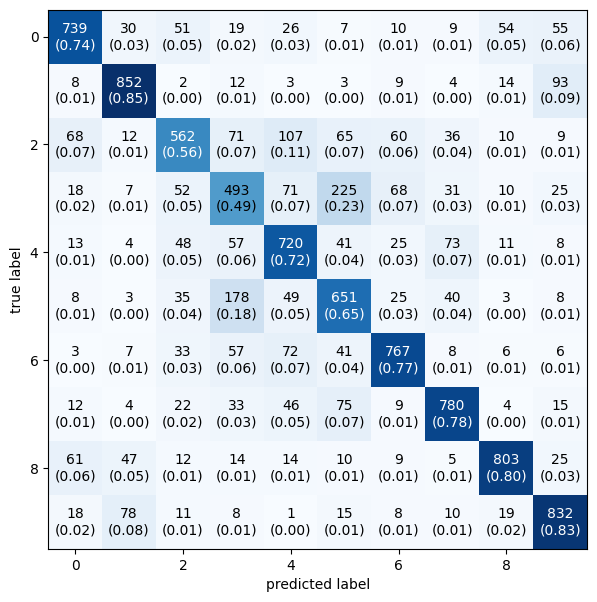

In [11]:

# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True) 

Text(0.5, 1.0, 'True label: cat Predicted: frog')

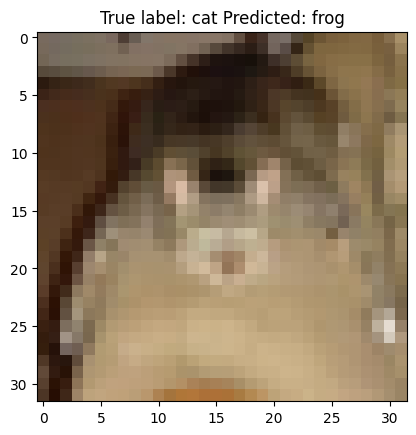

In [12]:

# Mostrar algumas classificaç!oes erradas
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))